# Roteiro de Estudos em Data Science

---




# Aula 1: O que é Data Science


A arte de descobrir tendências e informações ocultas nos dados existe desde os tempos antigos. Os antigos egípcios usaram dados do censo para aumentar a eficiência na coleta de impostos e previram com precisão a inundação do rio Nilo todos os anos. 

A Ciência da Dados nos dias atuais é um campo de pesquisa multi-disciplinar que utiliza técnicas de diversas disciplinas como
Matemática, Estatística, Ciência da computação: Inteligencia Artificial e Aprendizado de Máquina e também conhecimento dos negócios ou do universo no quais os dados estão inseridos. Tudo isso para adquirir, armazenar, analisar, gerenciar e publicar dados e análises de dados.

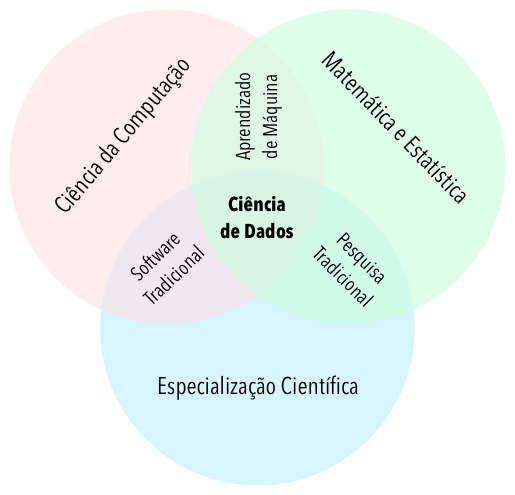


# Aula 2: Análise Exploratória de **Dados**

> Um dos primeiros passos que devemos nos preocupar é a chamada Análise Exploratória de Dados, ou EDA, que é refere-se ao processo crítico de realização de investigações iniciais sobre os dados, de modo a descobrir padrões, detectar anomalias, testar hipóteses e verificar suposições com a ajuda de estatísticas resumidas e representações gráficas.

> Nosso foco aqui é explorar alguns algoritmos de Aprendizado de Máquina. Contudo, é importante explorar nossa base antes de tentar aplicar qualquer técnica, isso nos ajudará a entender o que temos nas mãos e será também fundamental para posteriormente tentar compreender a saída dos algoritmos.

> Algumas bibliotecas interessantes que nos auxiliam nessa etapa são o Pandas e o Sweetviz, vamos adotar uma base clássica e ver o que podemos fazer utilizando essas bibliotecas.

>Para começar escolheremos uma base de dados pública, você pode baixar uma base de dados do Kaggle ou da UCI (links a seguir). Aqui escolhi uma base de cancer de mama, disponível em ambos os repositórios.

 https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table


In [26]:
!pip install mpld3

     |████████████████████████████████| 1.0 MB 114 kB/s eta 0:00:01
  Created wheel for mpld3: filename=mpld3-0.5.1-py3-none-any.whl size=364062 sha256=2f952e480cc4e663efb8c36d0ec15c44bbb42f4af50e93a1a1f89fdd6dcd8dd8
  Stored in directory: /home/lariza/.cache/pip/wheels/b3/dc/b3/207c17ae6ff63d48f9b8355849eb45407960207fb75a256e5e
Successfully built mpld3


In [33]:
#algumas bibliotecas fundamentais, uma delas é o pandas que nos permite trabalhar facilmente com tabelas

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import mpld3 as mpl


from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn import tree



In [2]:

#Baixei o arquivo no formato csv e vou fazer o upload dele aqui...

from google.colab import files
files.upload()


ModuleNotFoundError: No module named 'google.colab'

In [7]:
#utilizando o pandas vamos carregar os dados e dar uma espiada neles
df = pd.read_csv('./data.csv')
df.head() # mostra as primeiras 5 linhas do arquivo


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#podemos também visualizar os tipos de dados que existem no nosso banco

df.info() # mostra os tipos de cada coluna, object normalmente é utilizado para indicar atributos categóricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

A partir dessas informações, já podemos ver que alguns recursos não serão relevantes em nossa análise exploratória, pois há muitos valores nulos. O non-null mostra isso.

Além disso, há tantos recursos para analisar que pode ser melhor se concentrar naqueles que podem nos fornecer percepções reais. Vamos apenas remover o Id, e colunas com identificação (exemplo nomes, endereços) e os atributos  com mais de 30% de NaN (o que não tenho aqui no meu caso, mas que você pode ter).

In [9]:
# df.count() na conta NaN ou seja vai pegar somente linhas com informação
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['id']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: id, Unnamed: 32, 



* Agora vamos utilizar o sweetviz para descrever os dados, lembrando que você pode fazer isso manualmente, sem utilizar bibliotecas

In [6]:
#Instale ele utilizando o pip
!pip install sweetviz


     |████████████████████████████████| 15.1 MB 211 kB/s eta 0:00:01    |████████████████▍               | 7.7 MB 192 kB/s eta 0:00:39
     |████████████████████████████████| 70 kB 173 kB/s eta 0:00:01
  Using cached importlib_resources-3.3.0-py2.py3-none-any.whl (26 kB)


In [7]:
# para utilizar é preciso importar
import sweetviz as sv

#note que ele gerará um arquivo SWEETVIZ_REPORT.html
#analise com atenção os atributos é o momento de entender as relações entre eles
# para fazer uma análise adequada, procure conhecer o domínio do problema que está lidando
# que tipos de análises são possíveis: classificação, regressão, etc


relatorio = sv.analyze(df)
relatorio.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Em geral, podemos fazer isso para verificar outliers, ou seja, pontos fora da curva que gostaríamos de remover, dependendo do problema, pode ser útil fazer um filtro, pois os outliers vão impactar os algoritmos de AM.

Remova colunas inúteis, como aquelas com valores constantes, ids, nomes próprios, ou ainda as que tem em sua maior parte valores vazios.


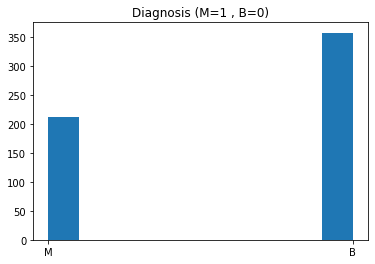

In [10]:
# vc também pode fazer manualmente plotando a classe e os atributos
# minha classe nesse banco é Maligno e Benigno veja:

df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

# Agora que nossa base de dados está ok, vamos para os algoritmos de ML




# Seleção de Atributos

Antes de prosseguirmos com a classificação, vamos fazer uma seleção de atributos. A seleção de atributos mais relevantes é uma etapa essencial para eliminar atributos desnecessários, que poderão prejudicar o desempenho dos algorimos de AM, inserindo viéses.

Uma etapa necessária para execução dos algoritmos de seleção e classificação é a separação da classe (atributo especial) do restante dos atributos, no nosso caso exite uma coluna na base que usarei como classe, a coluna diagnosis, que representa o diagnóstico da doença.

In [11]:
#y inclui a nossa classe e X para nossos atributos
y = df['diagnosis']   # Maligno  ou  Benigno  são os valores da coluna y

list = ['diagnosis']
x = df.drop(list,axis = 1 ) # axis representa o eixo que vamos deletar 1 é coluna!


x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:

y = y.replace("B", 0)  # alumas métricas não funcionam com valores categóricos "B", por isso vou substituir aqui por numerico
y = y.replace("M", 1)

# separa 70 % para o treinamento e 30 % para o test
#lembre-se o teste é a parte dos dados reservada, o algoritmo não terá contato com ela durante o treinamento

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [44]:
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

#Como vimos em aula, existem várias técnicas de FSS, no sklearn algumas disponíveis podem ser consultadas em:
# https://scikit-learn.org/stable/modules/feature_selection.html

# vou utilizar uma técnica baseada em árvores para selecionar atributos

print(x_train.shape)  

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_train, y_train)
print(clf.feature_importances_)  

model = SelectFromModel(clf, prefit=True)

# vamos aplicar a seleção de atributos pegando apenas as colunas que forma selecionadas
x_new = model.transform(x_train)
x_test_new = model.transform(x_test) ## temos que fazer o mesmo para o conjunto de testes


x_new.shape  




(398, 30)
[0.0597605  0.01545288 0.06824293 0.02490644 0.01353225 0.03142742
 0.04228223 0.0917818  0.00598417 0.00654141 0.02373367 0.00508432
 0.02259317 0.02413236 0.00613586 0.00669569 0.00883157 0.00818794
 0.00648147 0.00563227 0.11626798 0.02105458 0.10282008 0.05785502
 0.01795541 0.02214913 0.06567581 0.09491701 0.01348534 0.0103993 ]


(398, 9)

In [48]:
def geraModelo(model,train_set_X,train_set_Y,test_set_X, test_set_Y):
    model.fit(train_set_X,train_set_Y)
    prediction=model.predict(test_set_X)
    acc = metrics.accuracy_score(prediction,test_set_Y)
    prec = metrics.precision_score(prediction,test_set_Y)
    rec = metrics.recall_score(prediction,test_set_Y)
    roc = metrics.roc_auc_score(prediction,test_set_Y)
    metricas = np.array([acc, prec, rec, roc])
    
    return metricas


In [49]:
#vamos plotar os atributos selecionados para ver se deu certo!
metricas = pd.DataFrame()

#declarando os modelos 
rf=RandomForestClassifier(n_estimators=100)# Floresta Aletoria
clf = tree.DecisionTreeClassifier()
neigh = KNeighborsClassifier(n_neighbors=5)
mlp = MLPClassifier(random_state=1, max_iter=1000)


#treinando e testando
rf_metricas = geraModelo(rf, x_new, y_train, x_test_new, y_test)
clf_metricas = geraModelo(clf, x_new, y_train, x_test_new, y_test)
neigh_metricas = geraModelo(neigh, x_new, y_train, x_test_new, y_test)
mlp_metricas = geraModelo(mlp, x_new, y_train, x_test_new, y_test)





In [50]:
#armazenando as métricas
coluna = np.array(["acc", "prec", "rec", "roc"])
metricas["Metricas"] = coluna
metricas["Random Forest"] = rf_metricas
metricas["Cart Tree"] = clf_metricas
metricas["5-Vizinhos"] = neigh_metricas
metricas["Rede Neural"] = mlp_metricas

print(metricas)

  Metricas  Random Forest  Cart Tree  5-Vizinhos  Rede Neural
0      acc       0.964912   0.941520    0.923977     0.929825
1     prec       0.952381   0.920635    0.888889     0.873016
2      rec       0.952381   0.920635    0.903226     0.932203
3      roc       0.962302   0.937169    0.919503     0.930387



A Random Forest obteve os melhores resultados!